In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score

In [11]:
df = pd.read_csv('./fake_news.csv')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 42, stratify=df['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42, stratify=y_test)

In [20]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_val = vectorizer.transform(X_val)

## Результаты на валидационных данных

In [21]:
model = PassiveAggressiveClassifier(C = 0.5, random_state=42)

model.fit(X_train, y_train)

test_pred = model.predict(X_val)
report = classification_report(y_val, test_pred)
print(report)

              precision    recall  f1-score   support

        FAKE       0.95      0.96      0.96       316
        REAL       0.96      0.95      0.96       317

    accuracy                           0.96       633
   macro avg       0.96      0.96      0.96       633
weighted avg       0.96      0.96      0.96       633



In [22]:
y_score = model.decision_function(X_val)

print('ROC AUC метрика')
roc_auc_score(y_val, y_score)

ROC AUC метрика


0.9931417961106896

## Результаты на тестовых данных

In [23]:
test_pred = model.predict(X_test)
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       317
        REAL       0.94      0.94      0.94       317

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



In [24]:
y_score = model.decision_function(X_test)

print('ROC AUC метрика')
roc_auc_score(y_test, y_score)

ROC AUC метрика


0.9835703410323519

Text(0.5, 1.0, 'Матрица ошибок')

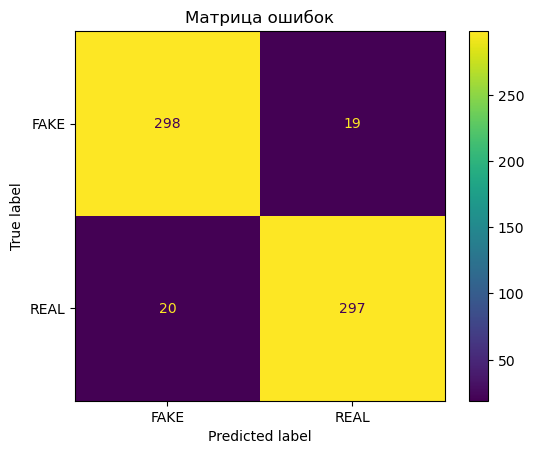

In [25]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, ax=ax)
ax.set_title("Матрица ошибок")